In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = ...

Вывести несколько первых строк сгруппированных данных

In [9]:
grouped_df = df.groupby('Дата', as_index=False)['Количество'].sum()

In [11]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

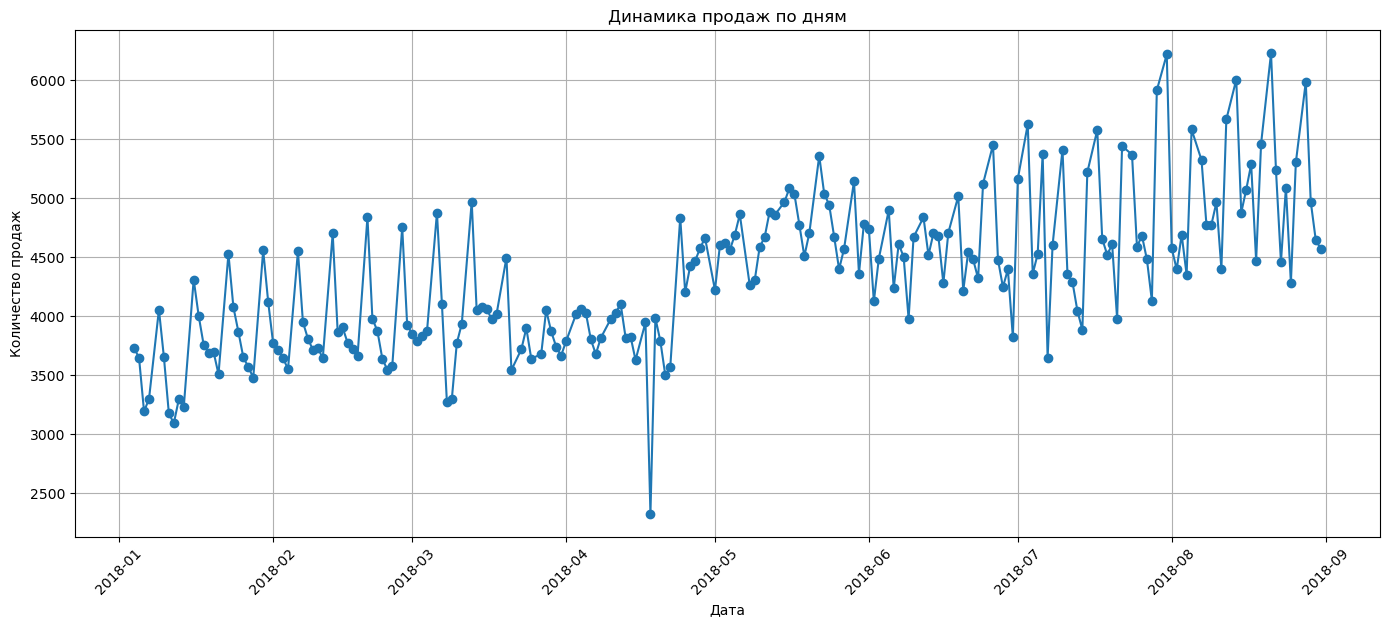

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
#Регулярные колебания — возможно, недельный или сезонный цикл.
#Есть явные пики продаж и спады.
#Некоторые даты сильно выбиваются вверх сезонный спрос или сбои.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [15]:
max_outlier = df[df['Количество'] == df['Количество'].max()]
max_outlier

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [19]:
df['День_недели'] = df['Дата'].dt.dayofweek  
df['Месяц'] = df['Дата'].dt.month

filtered_df = df[
    (df['День_недели'] == 2) & 
    (df['Месяц'].between(6, 8)) &
    (df['Склад'] == 3)
]

top_product = (
    filtered_df
    .groupby('Номенклатура', as_index=False)['Количество']
    .sum()
    .sort_values(by='Количество', ascending=False)
    .head(1)
)

top_product

,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [3]:
import pandas as pd

In [9]:
weather_df = pd.read_csv("weather_astana.csv", encoding="cp1251", sep=";")

weather_df.columns.tolist(), weather_df.head()

(['Местное время в Астане',
  'T',
  'Po',
  'P',
  'Pa',
  'U',
  'DD',
  'Ff',
  'ff10',
  'ff3',
  'N',
  'WW',
  'W1',
  'W2',
  'Tn',
  'Tx',
  'Cl',
  'Nh',
  'H',
  'Cm',
  'Ch',
  'VV',
  'Td',
  'RRR',
  'tR',
  'E',
  'Tg',
  "E'",
  'sss'],
   Местное время в Астане     T     Po      P   Pa     U  \
 0       31.08.2018 23:00   8,2  736,6  768,3  0,2  78.0   
 1       31.08.2018 20:00   9,6  736,4  767,9  1,2  88.0   
 2       31.08.2018 17:00  11,3  735,2  766,4  0,4  83.0   
 3       31.08.2018 14:00  12,3  734,8  765,9  0,9  80.0   
 4       31.08.2018 11:00  13,2  733,9  764,8  1,0  83.0   
 
                                        DD  Ff  ff10  ff3  ...  \
 0          Ветер, дующий с северо-востока   4   NaN  NaN  ...   
 1    Ветер, дующий с западо-северо-запада   3   NaN  NaN  ...   
 2  Ветер, дующий с востоко-северо-востока   4   NaN  NaN  ...   
 3          Ветер, дующий с северо-востока   4   NaN  NaN  ...   
 4   Ветер, дующий с северо-северо-востока   4   NaN  Na

In [13]:
weather_df['ДатаВремя'] = pd.to_datetime(weather_df['Местное время в Астане'], format="%d.%m.%Y %H:%M", errors='coerce')
weather_df['Температура'] = weather_df['T'].str.replace(',', '.', regex=False).astype(float)
weather_df['Дата'] = weather_df['ДатаВремя'].dt.normalize()

daily_temp = weather_df.groupby('Дата', as_index=False)['Температура'].mean()

df = pd.read_csv('data.csv')
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
grouped_df = df.groupby('Дата', as_index=False)['Количество'].sum()
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='inner')

merged_df.shape, merged_df[['Количество', 'Температура']].corr().iloc[0, 1]

((205, 3), 0.6002192404640327)

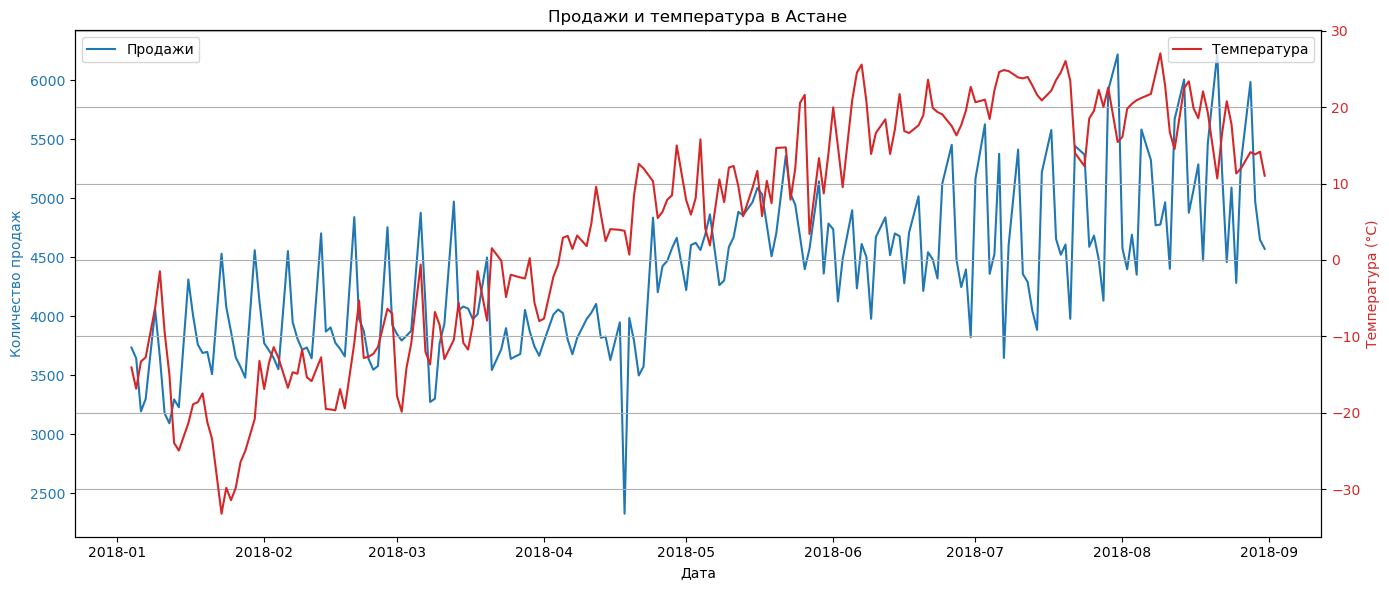

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Продажи', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Температура (°C)', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['Температура'], label='Температура', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title("Продажи и температура в Астане")
plt.grid(True)
plt.tight_layout()
plt.show()